In [1]:
!pip install git+https://github.com/dib-lab/screed.git

  Cloning https://github.com/dib-lab/screed.git to /tmp/pip-ClPdki-build


## Basic screed loading of sequences

In [2]:
import screed

In [3]:
ls

data/  Dockerfile  Untitled1.ipynb  Untitled.ipynb


In [4]:
ls data

25k.fq.gz  chunks.fa.gz


In [20]:
for r in screed.open('data/chunks.fa.gz'):
    print r.name
    print r.sequence[:50]
    print len(r.sequence)

acido.chunk0
GTCCCATGGAATCAATAGCTTACAGGACGTTAATGTGTGTTTTTTTAGCG
515919
acido.chunk1
GATGATGCACATGGCGCAGCTTTCATATCCCTTGCAACTGGCACTTGCCG
515919
acido.chunk2
TGTCGTGCTGGCCTTCCTTACTGGAATAGCTGGCGCTCTGTATCCGGCGG
515919
acido.chunk3
TGGCCGATGGCGCGCACCAGGCCGGTCAGGCTCGCCGGCAGGGTCACGGG
515919
acido.chunk4
GGAAACGTGACCAGCACCGTGCGCCGCCTGAACAAAGCATGAGAAAACTA
515919
acido.chunk5
GCCTCGCCGCCATCGGCTACCTGATTCTCTTTGGATCGCTGCTCGGCTTC
515919
acido.chunk6
TGAGGATGCTGAGTTTCCGCGATGGTGACTCCGGTGCCGGAGCCCGGAAC
515919
acido.chunk7
CGTCGTCCTCTGTCTGGGCGCCGACCTTCTGGTTGATCAACAGGCCCGCG
515919


In [11]:
ls data

25k.fq.gz  chunks.fa.gz


In [14]:
for n, r in enumerate(screed.open('data/25k.fq.gz')):
    print n
    print r.name
    print r.sequence
    print r.quality
    if n > 5:
        break

0
895:1:1:1246:14654/1
CAGGCGCCCACCACCGTGCCCTCCAACCTGATGGT
][aaX__aa[`ZUZ[NONNFNNNNNO_____^RQ_
1
895:1:1:1248:9583/1
ACTGGGCGTAGACGGTGTCCTCATCGGCACCAGC
\UJUWSSV[JQQWNP]]SZ]ZWU^]ZX][^TXR`
2
895:1:1:1252:19493/1
CCGGCGTGGTTGGTGAGGTCACTGAGCTTCATGTC
OOOKONNNNN__`R]O[TGTRSY[IUZ]]]__X__
3
895:1:1:1255:18861/1
ACGACGAGAAGCTGATCTACCGCGCCGAGCGCATC
bb_^^bb_XTbbbbbb_bab]KTITZQTZ]ZYT^^
4
895:1:1:1264:15854/1
CGTGATGATGTGCTTGCGGCCGGAGGGCCTGTTGCCCAGG
````W__ZZ`R__ZSOJNNNQWSQZ\^X\W_______J__
5
895:1:1:1265:2265/1
TATAGCGTGAGGCGATGACGTTGCTGTCCTTGGCGCGGC
`bbbbbbbbbbbbbUbbbbb]X_QXUQ[QWOPTTZ__X_
6
895:1:1:1273:17782/1
TCGAAAATCACGTGGGAGATGCACTATCACGCGGTCGGTGAGGAAGTGACCGACCACACCGAGCTCGC
OOOOONNNOO^^X^`]TVa]WWLSSKNNONI]S[Q]SWXZX_\\^ZF___Y\V]]_____]KTRV^X^


In [17]:
lengths = []
for n, r in enumerate(screed.open('data/25k.fq.gz')):
    if n % 10000 == 0:
        print '...', n
    lengths.append(len(r.sequence))



... 0
... 10000
... 20000


(array([ 2295.,  2547.,  3178.,  3240.,  3005.,  3198.,  2511.,  2163.,
         1283.,  1580.]),
 array([  31. ,   39.3,   47.6,   55.9,   64.2,   72.5,   80.8,   89.1,
          97.4,  105.7,  114. ]),
 <a list of 10 Patch objects>)

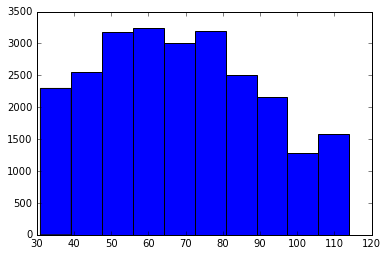

In [19]:
%matplotlib inline
from pylab import *
hist(lengths)

## Trimming or modifying sequence record

In [23]:
# renaming all the sequences
with open('fubar-name.fq', 'w') as fp:
    for n, record in enumerate(screed.open('data/25k.fq.gz')):
        seq = record.sequence
        qual = record.quality
        name = 'seq{0}'.format(n)
        fp.write('@{name}\n{seq}\n+\n{qual}\n'.format(name=name, seq=seq, qual=qual))

In [24]:
for new_record in screed.open('fubar-name.fq'):
    pass

In [25]:
new_record.name

u'seq24999'

In [27]:
# trim off the last base
with open('fubar-name.fq', 'w') as fp:
    for n, record in enumerate(screed.open('data/25k.fq.gz')):
        seq = record.sequence[:-1]
        qual = record.quality[:-1]
        name = 'seq{0}'.format(n)
        fp.write('@{name}\n{seq}\n+\n{qual}\n'.format(name=name, seq=seq, qual=qual))

In [28]:
# replace | with - in FASTA names
with open('fubar-name.fa', 'w') as fp:
    for n, record in enumerate(screed.open('data/25k.fq.gz')):
        name = record.name.replace('|', '-')
        fp.write('>{name}\n{seq}\n'.format(name=name, seq=record.sequence))

In [29]:
# question: how do you know if you opened a FQ or a FA file?
if hasattr(record, 'quality'):
    print 'this is a fastq record'
else:
    print 'this is a fasta file'

this is a fastq record


In [33]:
sniff_record = next(iter(screed.open('data/25k.fq.gz')))
print hasattr(sniff_record, 'quality')
print sniff_record.quality

True
][aaX__aa[`ZUZ[NONNFNNNNNO_____^RQ_


In [34]:
sniff_record = next(iter(screed.open('data/chunks.fa.gz')))
print hasattr(sniff_record, 'quality')
print sniff_record.quality

False


AttributeError: quality

## What is a screed Record?

In [35]:
screed.Record

screed.screedRecord.Record

In [37]:
new_record = screed.Record(name='lisa', sequence='ATGCCAGA', quality='#'*8)

In [38]:
new_record.hereisanewattribute = 'something'

In [39]:
print new_record

{'quality': '########', 'name': 'lisa', 'sequence': 'ATGCCAGA'}


In [40]:
print new_record['quality']

########


In [41]:
print new_record.quality

########


## One more super useful feature: reverse complements

In [43]:
sequence = 'ATGGGCAGGATTGAG'
print screed.rc(sequence)

CTCAATCCTGCCCAT


## suppose I wanted to grab a specific sequence

In [44]:
for record in screed.open('data/chunks.fa.gz'):
    if record.name == 'acido.chunk5':
        break
        
print record.name, len(record.sequence)

acido.chunk5 515919


In [46]:
# something I do a lot of...
names_to_retrieve = set()
names_to_retrieve.add('acido.chunk5')
names_to_retrieve.add('acido.chunk6')

retrieved = []

for record in screed.open('data/chunks.fa.gz'):
    if record.name in names_to_retrieve:
        retrieved.append(record)

In [47]:
len(retrieved)

2

In [53]:
# create database at command line
!python -m screed.fadbm 'data/chunks.fa.gz'

Database saved in data/chunks.fa.gz_screed


In [61]:
ls -l data/

total 6620
-rw-rw-r-- 1 main main 1437611 Oct  5 16:14 25k.fq.gz
-rw-rw-r-- 1 main main 1188865 Oct  5 16:14 chunks.fa.gz
-rw-r--r-- 1 main main 4149248 Oct  5 17:22 chunks.fa.gz_screed


In [59]:
# load database in Python
db = screed.ScreedDB('data/chunks.fa.gz')

In [55]:
record = db['acido.chunk5']

In [57]:
print record.name
print len(record.sequence)

acido.chunk5
515919


In [62]:
db.keys()

[u'acido.chunk0',
 u'acido.chunk1',
 u'acido.chunk2',
 u'acido.chunk3',
 u'acido.chunk4',
 u'acido.chunk5',
 u'acido.chunk6',
 u'acido.chunk7']

In [63]:
for name in db:
    print name

acido.chunk0
acido.chunk1
acido.chunk2
acido.chunk3
acido.chunk4
acido.chunk5
acido.chunk6
acido.chunk7


In [67]:
for name in db:
    record = db[name]
    print record.name
    print len(record.sequence)

acido.chunk0
515919
acido.chunk1
515919
acido.chunk2
515919
acido.chunk3
515919
acido.chunk4
515919
acido.chunk5
515919
acido.chunk6
515919
acido.chunk7
515919
